In [1]:
print('gnight')

gnight


# set up 

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
!pip install statsmodels

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose


!pip install matplotlib
!pip install ydata_profiling
%matplotlib inline

import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from datetime import date

def extract_first_date_of_week(date):
    
    # Find the Monday of the week
    monday = date - timedelta(days=date.weekday())

    return monday.strftime('%Y-%m-%d')

def extract_first_date_of_month(date):
    # Replace the day part of the date with 1 to get the first day of the month
    first_date_of_month = pd.to_datetime(date).replace(day=1)
    return first_date_of_month

def convert_index(df):
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['season'] = df.month%12 // 3 + 1
    
def create_features(df,col):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df[col].dt.hour
    df['dayofweek'] = df[col].dt.dayofweek
    df['quarter'] = df[col].dt.quarter
    df['month'] = df[col].dt.month
    df['year'] = df[col].dt.year
    df['dayofyear'] = df[col].dt.dayofyear
    df['dayofmonth'] = df[col].dt.day
    df['weekofyear'] = df[col].dt.isocalendar().week
    return df

# pandas profiling

In [9]:
!pip install pandas-profiling
!pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/04/45/647c0ebe33584476c335d789a55005683cfa640e07796266de8557560850/ydata_profiling-4.6.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ac/86/c98520827f58c8753783be4bf2286b4f73a18ac71c93ab597ae1aeb26fc8/pydantic-2.6.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for visions[type_image_path]==0.7.5 from https://files.pythonhosted.org/packages/62/fa/6a8539c83d2ccbd08d5f0c843b1784af9ff514e77f4c9d5d6800fdd340f6/visions-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://files.pythonhosted.org/packages/18/01/5fc45558268ced46d86292763477996a3cdd505567cd590a688e8cdc386e/typeguard-4.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud>=1.

In [15]:

from ydata_profiling import ProfileReport


In [12]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()

TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [51]:
df.CustomerNo =df.CustomerNo.astype(str)

In [52]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

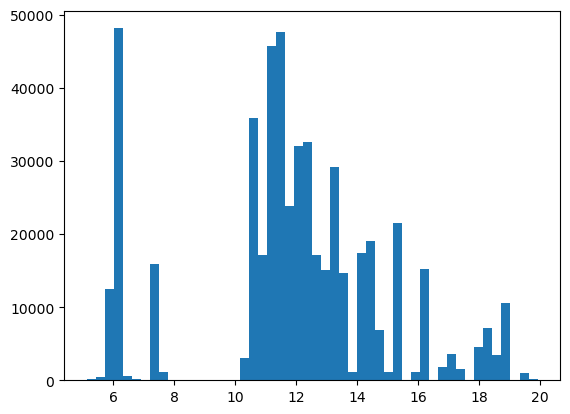

In [231]:
plt.hist(df[df['Price']<20]['Price'], bins =50)
plt.show()

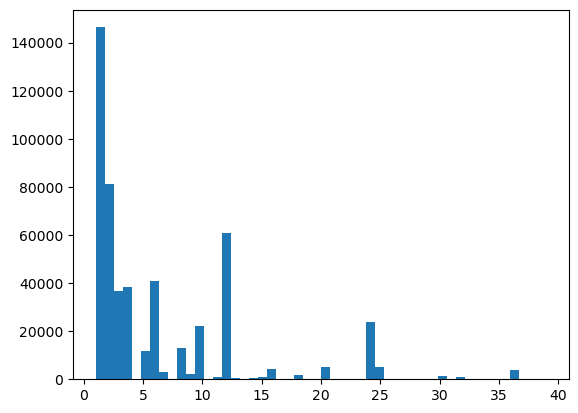

In [237]:
plt.hist(df[(df['Quantity']>0) & (df['Quantity']<40)]['Quantity'], bins =50)
plt.show()

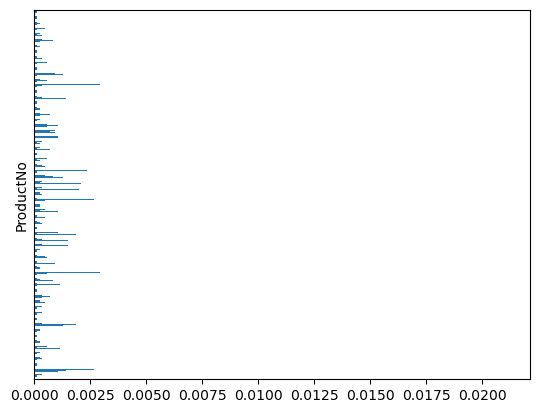

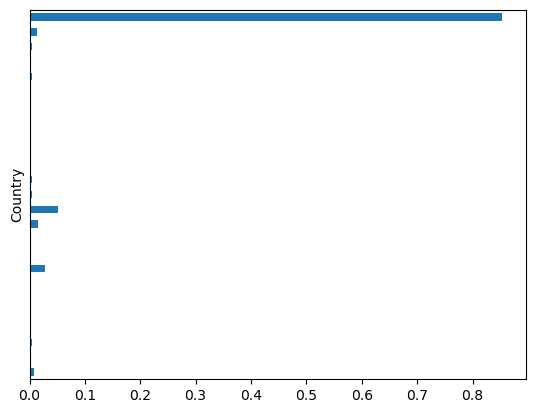

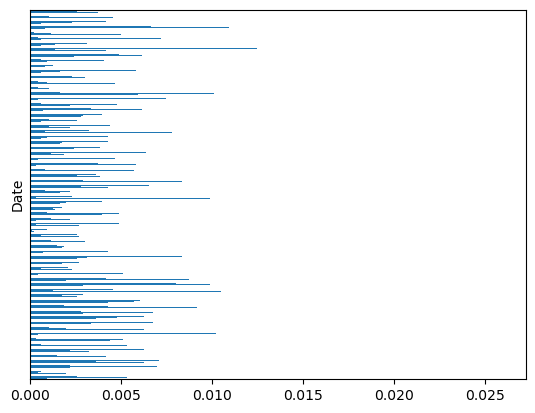

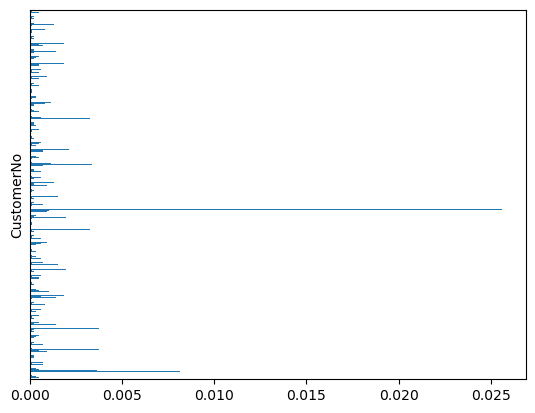

In [68]:
for col in ['ProductNo','Country','Date','CustomerNo']:
    (df[df['Quantity']<0].groupby(col)['Price'].count()/df[df['Quantity']<0]['Price'].count()).plot(kind='barh')
    plt.ylabel(col)
    plt.yticks([])
    plt.show()

No random in invalid values

<Axes: >

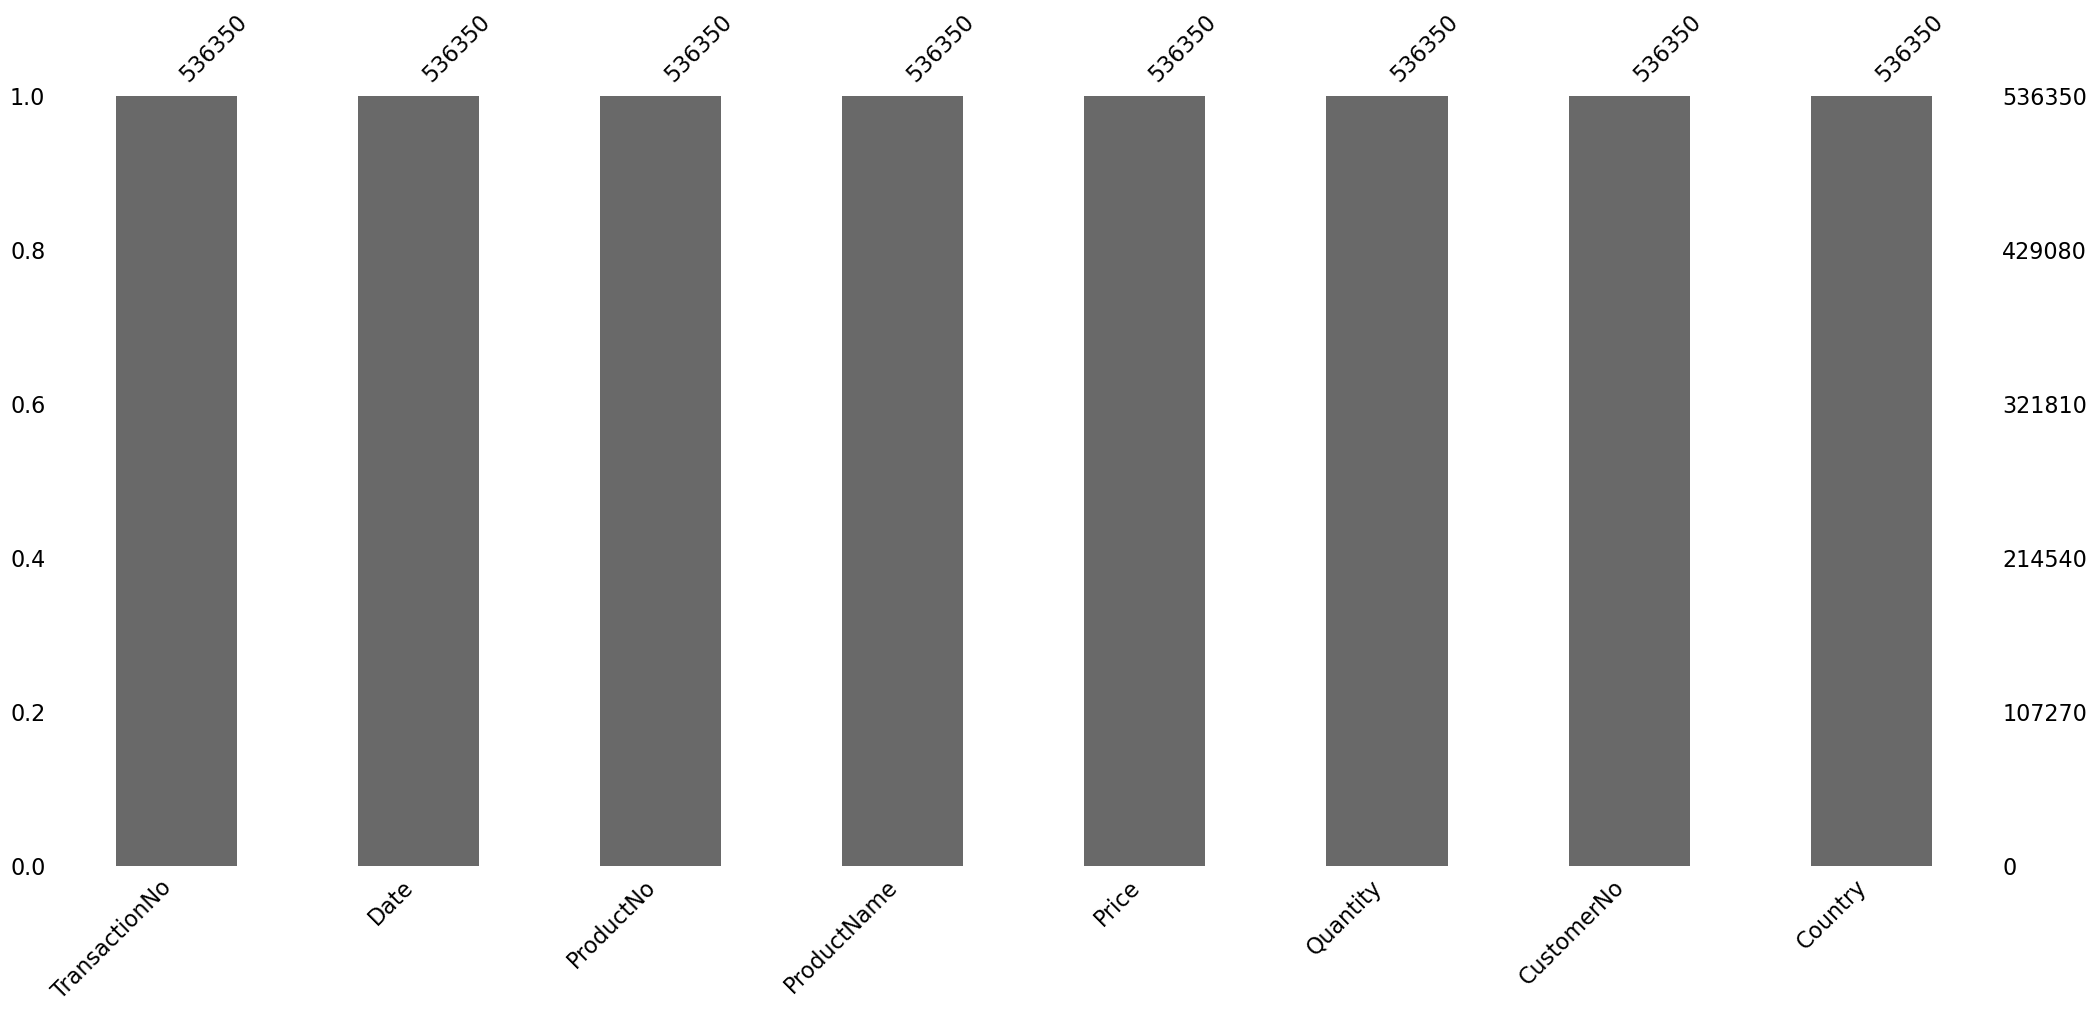

In [71]:
import missingno as msno
msno.bar(df)

<Axes: >

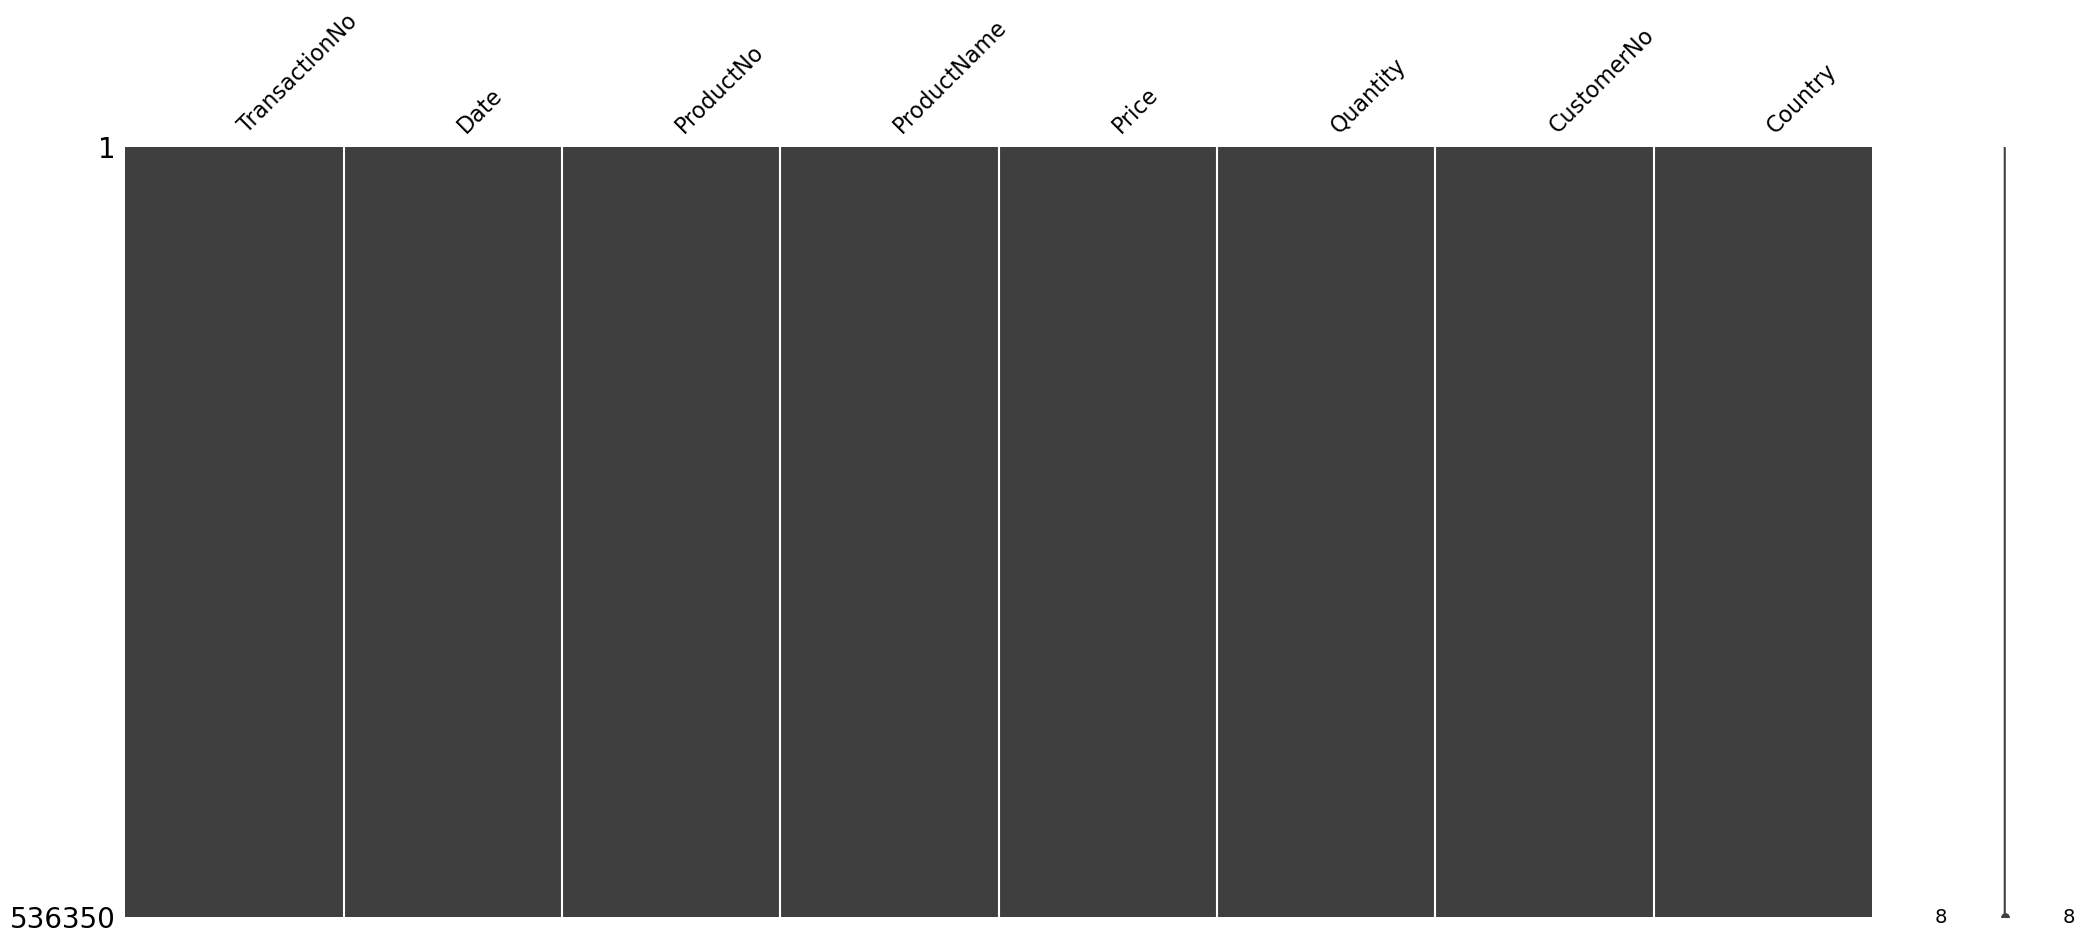

In [72]:
msno.matrix(df)

<Axes: >

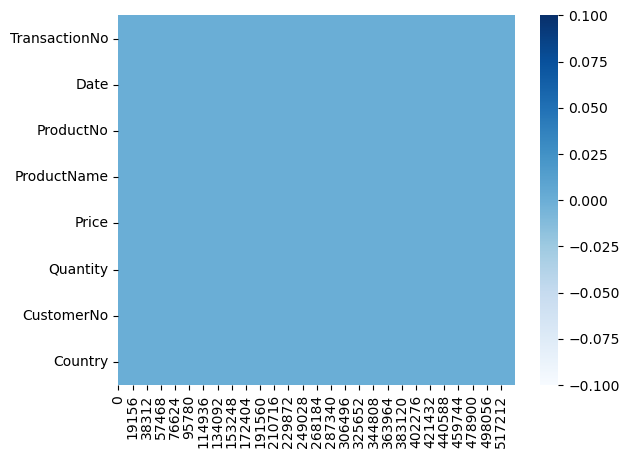

In [85]:
sns.heatmap(df.T.isna(), cmap ='Blues')

In [226]:
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [ ]:
remove duplicates, remove <0 quantity, why <0 quantity?

In [273]:
#clean 
df1 = df.drop_duplicates()
df1 = df1[(df1['Quantity']>0) &(df1['Price']<100) & (df1['Quantity']<100)]
# df1 = df1[(df1['Date']>='2019-01-01')&(df1['Date']<='2019-12-01')]
df1['rev'] = df1['Price']*df1['Quantity']
df1

TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536320        536585  12/1/2018     37449   
536321        536590  12/1/2018     22776   
536322        536590  12/1/2018     22622   
536323        536591  12/1/2018     37449   
536324        536597  12/1/2018     22220   

                                ProductName  Price  Quantity CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12    17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36    13069.0   
2                  Storage Tin Vintage Leaf  11.53        12    13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12    13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6    13069.0   
...                                     ...    ...       ...        ...   
536320   Ceramic Cake Stand + Hanging Cakes  20.45         2    17460.0   
536321         Sweetheart 3 Tier Cake Stand  20.45         1    13065.0   
536322       Box Of Vintage Alphabet Blocks  20.45         2    13065.0   
536323   Ceramic Cake Stand + Hanging Cakes  20.45         1    14606.0   
536324     Cake Stand Lovebird 2 Tier White  20.45         1    18011.0   

               Country     rev  
0       United Kingdom  257.64  
1       United Kingdom  383.40  
2       United Kingdom  138.36  
3       United Kingdom  127.80  
4       United Kingdom   71.64  
...                ...     ...  
536320  United Kingdom   40.90  
536321  United Kingdom   20.45  
536322  United Kingdom   40.90  
536323  United Kingdom   20.45  
536324  United Kingdom   20.45  

[515834 rows x 9 columns]

In [269]:
# df1[(df1['Date']>='2019-01-01')&(df1['Date']<='2019-12-01')]
df1[(df1['Date']>='2019-01-01') &(df1['Date']<='2019-12-01')]

Empty DataFrame
Columns: [TransactionNo, Date, ProductNo, ProductName, Price, Quantity, CustomerNo, Country, rev]
Index: []

In [276]:
from datetime import datetime, timedelta
from datetime import date

def extract_first_date_of_week(date):
    
    # Find the Monday of the week
    monday = date - timedelta(days=date.weekday())

    return monday.strftime('%Y-%m-%d')

def extract_first_date_of_month(date):
    # Replace the day part of the date with 1 to get the first day of the month
    first_date_of_month = pd.to_datetime(date).replace(day=1)
    return first_date_of_month

# Example usage:


df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1.Date.apply(extract_first_date_of_month)
df1['week'] = df1.Date.apply(extract_first_date_of_week)

<Axes: xlabel='Date'>

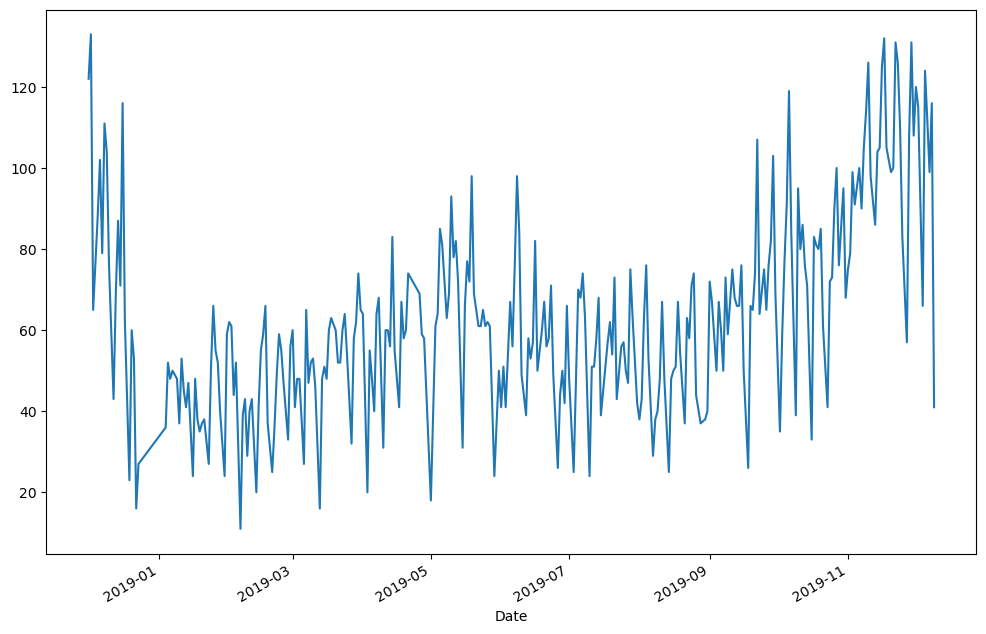

In [277]:
plt.figure(figsize=(12,8))
df1.groupby('Date')['TransactionNo'].nunique().plot(kind = 'line')


In [282]:
## clean 2
df1 = df1[(df1['Quantity']>0) &(df1['Price']<100) & (df1['Quantity']<100)]
df1 = df1[(df1['Date']>='2019-01-01')&(df1['Date']<='2019-11-15')]
df1['rev'] = df1['Price']*df1['Quantity']
df1

TransactionNo       Date ProductNo                   ProductName  \
70118         576617 2019-11-15     23486      Antique Heart Shelf Unit   
70119         576391 2019-11-15     22423      Regency Cakestand 3 Tier   
70120         576617 2019-11-15     22605     Wooden Croquet Garden Set   
70121         576617 2019-11-15     23104       Ivory Cafe Hanging Lamp   
70122         576618 2019-11-15     22423      Regency Cakestand 3 Tier   
...              ...        ...       ...                           ...   
494243        540043 2019-01-04     22776  Sweetheart 3 Tier Cake Stand   
494244        540060 2019-01-04     22968     Rose Cottage Keepsake Box   
494245        540094 2019-01-04     22782  Set 3 Wicker Storage Baskets   
494246        540096 2019-01-04     22782  Set 3 Wicker Storage Baskets   
494247        540098 2019-01-04     21623  Vintage Union Jack Memoboard   

        Price  Quantity CustomerNo         Country     rev      month  \
70118   44.37         1    16617.0  United Kingdom   44.37 2019-11-01   
70119   35.83         3    17391.0  United Kingdom  107.49 2019-11-01   
70120   35.83         1    16617.0  United Kingdom   35.83 2019-11-01   
70121   35.83         1    16617.0  United Kingdom   35.83 2019-11-01   
70122   35.83         1    17618.0  United Kingdom   35.83 2019-11-01   
...       ...       ...        ...             ...     ...        ...   
494243  20.45         1    15164.0  United Kingdom   20.45 2019-01-01   
494244  20.45         4    14732.0  United Kingdom   81.80 2019-01-01   
494245  20.45         4    14221.0  United Kingdom   81.80 2019-01-01   
494246  20.45         4    13253.0  United Kingdom   81.80 2019-01-01   
494247  20.45         1    16241.0  United Kingdom   20.45 2019-01-01   

              week  
70118   2019-11-11  
70119   2019-11-11  
70120   2019-11-11  
70121   2019-11-11  
70122   2019-11-11  
...            ...  
494243  2018-12-31  
494244  2018-12-31  
494245  2018-12-31  
494246  2018-12-31  
494247  2018-12-31  

[407415 rows x 11 columns]

<Axes: xlabel='Date'>

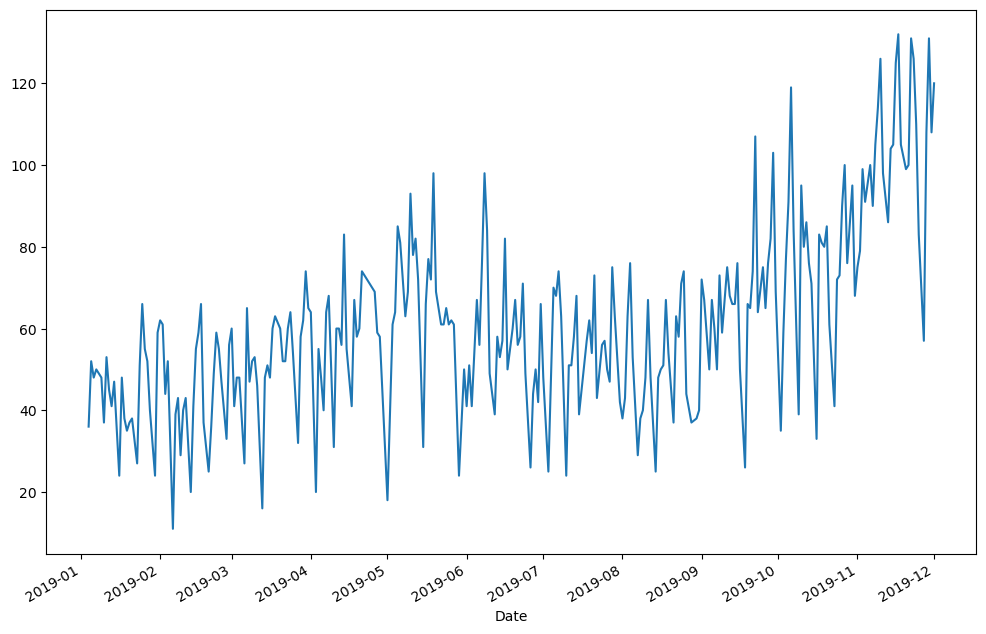

In [280]:
plt.figure(figsize=(12,8))
df1.groupby('Date')['TransactionNo'].nunique().plot(kind = 'line')

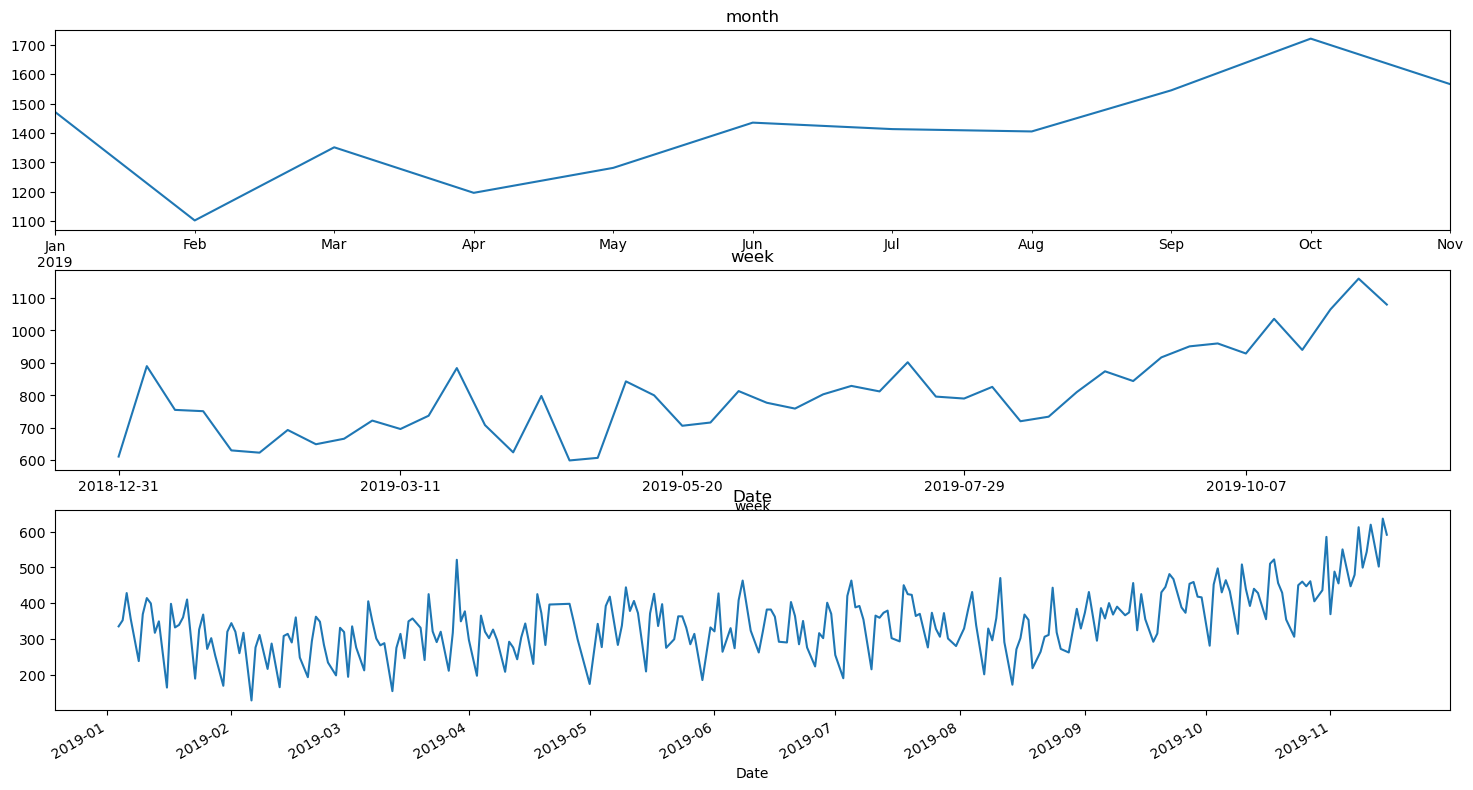

In [283]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(18,10))
for time,i in zip(['month','week','Date'],[0,1,2,3]):
    df1.groupby(time)['rev'].nunique().plot(kind = 'line', ax = ax[i])
    ax[i].set_title(time)

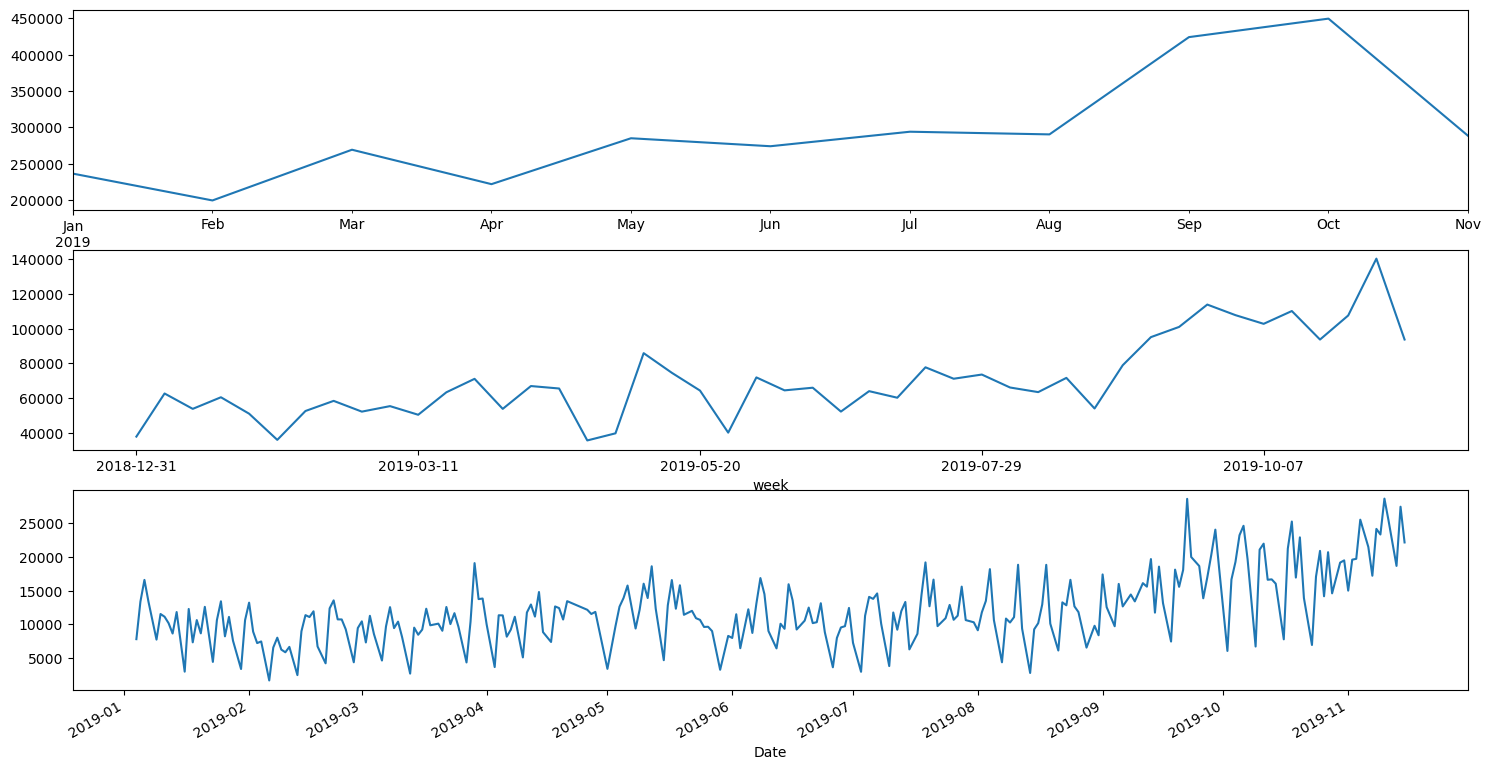

In [284]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(18,10))
for time,i in zip(['month','week','Date'],[0,1,2,3]):
    df1.groupby(time)['Quantity'].sum().plot(kind = 'line', ax = ax[i])

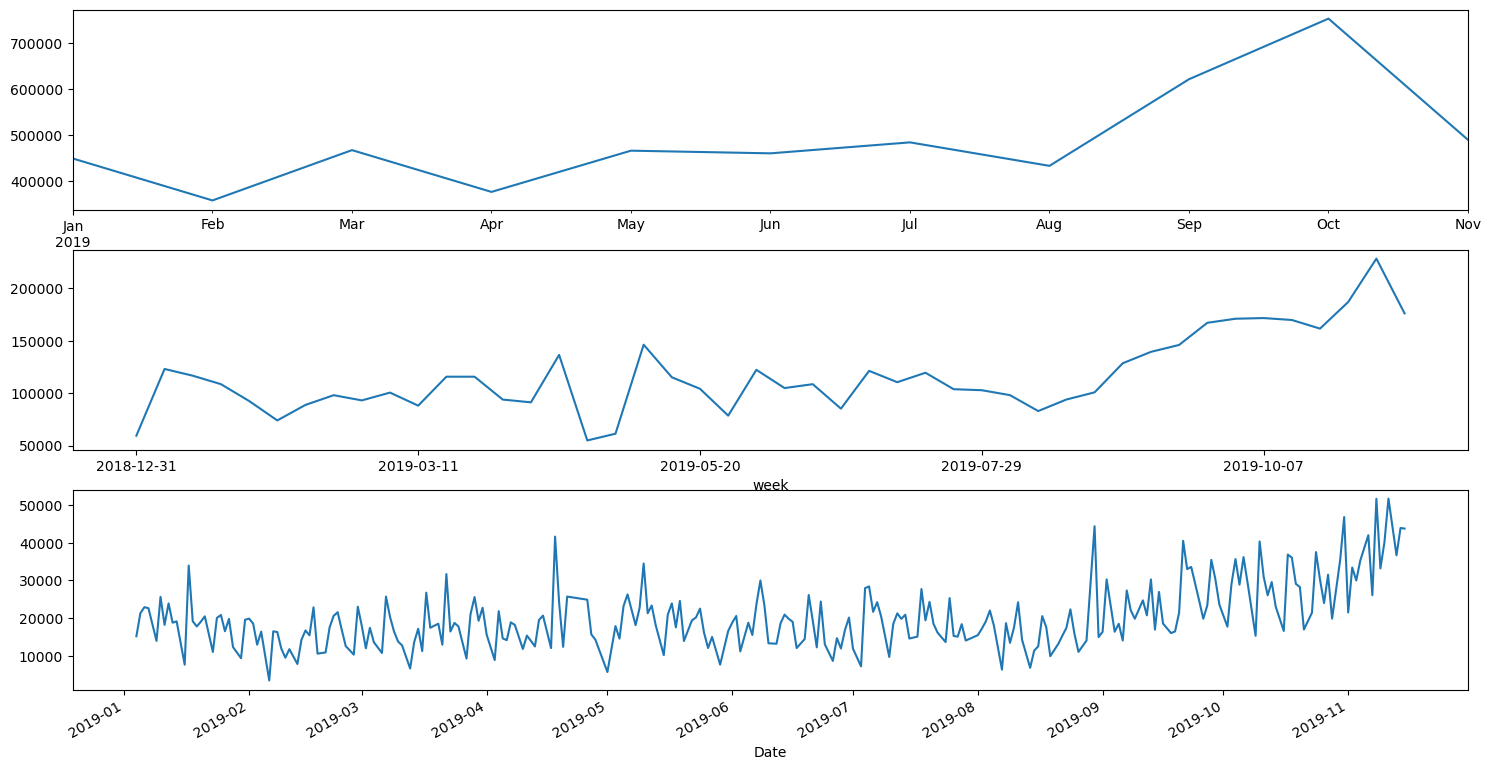

In [285]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(18,10))
for time,i in zip(['month','week','Date'],[0,1,2,3]):
    df1.groupby(time)['Price'].sum().plot(kind = 'line', ax = ax[i])

In [286]:
#create features
def create_features(df,col):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df[col].dt.hour
    df['dayofweek'] = df[col].dt.dayofweek
    df['quarter'] = df[col].dt.quarter
    df['month'] = df[col].dt.month
    df['year'] = df[col].dt.year
    df['dayofyear'] = df[col].dt.dayofyear
    df['dayofmonth'] = df[col].dt.day
    df['weekofyear'] = df[col].dt.isocalendar().week
    return df
df2 = create_features(df1,'Date')
df2

TransactionNo       Date ProductNo                   ProductName  \
70118         576617 2019-11-15     23486      Antique Heart Shelf Unit   
70119         576391 2019-11-15     22423      Regency Cakestand 3 Tier   
70120         576617 2019-11-15     22605     Wooden Croquet Garden Set   
70121         576617 2019-11-15     23104       Ivory Cafe Hanging Lamp   
70122         576618 2019-11-15     22423      Regency Cakestand 3 Tier   
...              ...        ...       ...                           ...   
494243        540043 2019-01-04     22776  Sweetheart 3 Tier Cake Stand   
494244        540060 2019-01-04     22968     Rose Cottage Keepsake Box   
494245        540094 2019-01-04     22782  Set 3 Wicker Storage Baskets   
494246        540096 2019-01-04     22782  Set 3 Wicker Storage Baskets   
494247        540098 2019-01-04     21623  Vintage Union Jack Memoboard   

        Price  Quantity CustomerNo         Country     rev  month        week  \
70118   44.37         1    16617.0  United Kingdom   44.37     11  2019-11-11   
70119   35.83         3    17391.0  United Kingdom  107.49     11  2019-11-11   
70120   35.83         1    16617.0  United Kingdom   35.83     11  2019-11-11   
70121   35.83         1    16617.0  United Kingdom   35.83     11  2019-11-11   
70122   35.83         1    17618.0  United Kingdom   35.83     11  2019-11-11   
...       ...       ...        ...             ...     ...    ...         ...   
494243  20.45         1    15164.0  United Kingdom   20.45      1  2018-12-31   
494244  20.45         4    14732.0  United Kingdom   81.80      1  2018-12-31   
494245  20.45         4    14221.0  United Kingdom   81.80      1  2018-12-31   
494246  20.45         4    13253.0  United Kingdom   81.80      1  2018-12-31   
494247  20.45         1    16241.0  United Kingdom   20.45      1  2018-12-31   

        hour  dayofweek  quarter  year  dayofyear  dayofmonth  weekofyear  
70118      0          4        4  2019        319          15          46  
70119      0          4        4  2019        319          15          46  
70120      0          4        4  2019        319          15          46  
70121      0          4        4  2019        319          15          46  
70122      0          4        4  2019        319          15          46  
...      ...        ...      ...   ...        ...         ...         ...  
494243     0          4        1  2019          4           4           1  
494244     0          4        1  2019          4           4           1  
494245     0          4        1  2019          4           4           1  
494246     0          4        1  2019          4           4           1  
494247     0          4        1  2019          4           4           1  

[407415 rows x 18 columns]

In [243]:
numeric_columns = df2.select_dtypes(include='number')
numeric_columns

Price  Quantity     rev  month  hour  dayofweek  quarter  year  \
0       21.47        12  257.64     12     0          0        4  2019   
1       10.65        36  383.40     12     0          0        4  2019   
2       11.53        12  138.36     12     0          0        4  2019   
3       10.65        12  127.80     12     0          0        4  2019   
4       11.94         6   71.64     12     0          0        4  2019   
...       ...       ...     ...    ...   ...        ...      ...   ...   
536320  20.45         2   40.90     12     0          5        4  2018   
536321  20.45         1   20.45     12     0          5        4  2018   
536322  20.45         2   40.90     12     0          5        4  2018   
536323  20.45         1   20.45     12     0          5        4  2018   
536324  20.45         1   20.45     12     0          5        4  2018   

        dayofyear  dayofmonth  weekofyear  
0             343           9          50  
1             343           9          50  
2             343           9          50  
3             343           9          50  
4             343           9          50  
...           ...         ...         ...  
536320        335           1          48  
536321        335           1          48  
536322        335           1          48  
536323        335           1          48  
536324        335           1          48  

[499348 rows x 11 columns]

<Axes: >

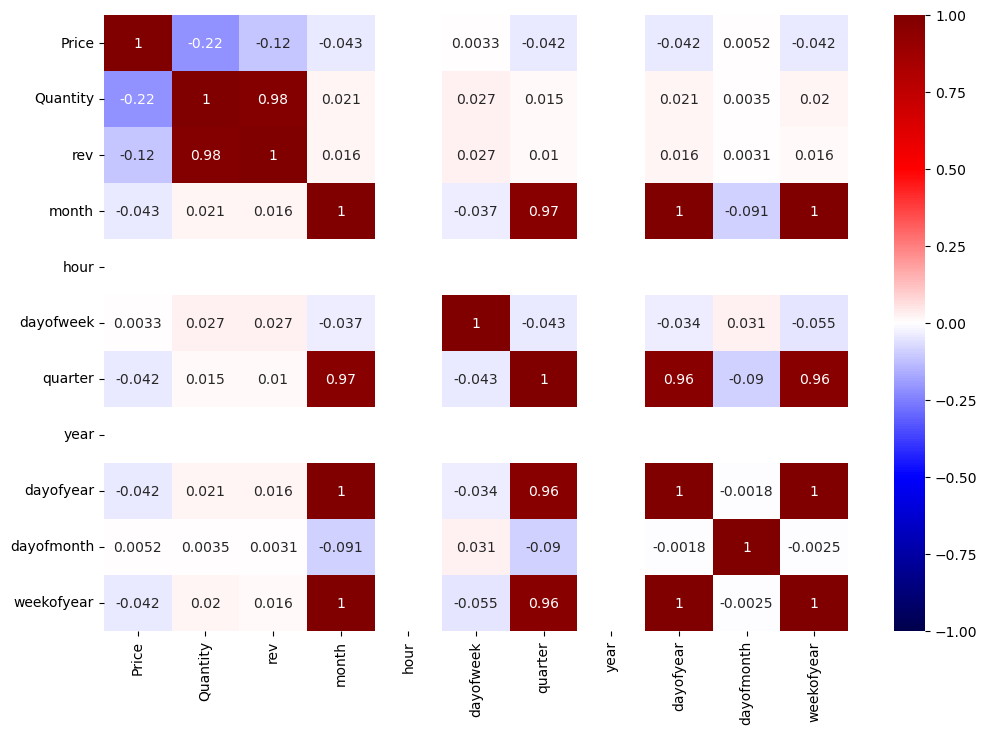

In [287]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (12,8))
sns.heatmap(df2.select_dtypes(include='number').corr(), annot=True,cmap='seismic',vmin=-1, vmax=1)

In [377]:
df3 = df2.groupby('Date')[['Price','Quantity','rev','TransactionNo']].agg({'Price': 'sum',
    'Quantity': 'sum',
    'rev': 'sum',
    'TransactionNo': 'nunique'}).reset_index()
df3 = create_features(df3,'Date')
df3

Date     Price  Quantity        rev  TransactionNo  hour  dayofweek  \
0   2019-01-04  15181.31      7809   94274.04             36     0          4   
1   2019-01-05  21337.68     13360  159500.77             52     0          5   
2   2019-01-06  22906.71     16592  197596.46             48     0          6   
3   2019-01-07  22618.88     13367  158895.75             50     0          0   
4   2019-01-09  13943.12      7740   90919.29             48     0          2   
..         ...       ...       ...        ...            ...   ...        ...   
259 2019-11-10  40153.88     28632  344978.18            126     0          6   
260 2019-11-11  51761.26     25448  304413.58             98     0          0   
261 2019-11-13  36707.10     18664  216967.31             86     0          2   
262 2019-11-14  43956.02     27434  334803.65            104     0          3   
263 2019-11-15  43794.06     22139  266617.81            105     0          4   

     quarter  month  year  dayofyear  dayofmonth  weekofyear  
0          1      1  2019          4           4           1  
1          1      1  2019          5           5           1  
2          1      1  2019          6           6           1  
3          1      1  2019          7           7           2  
4          1      1  2019          9           9           2  
..       ...    ...   ...        ...         ...         ...  
259        4     11  2019        314          10          45  
260        4     11  2019        315          11          46  
261        4     11  2019        317          13          46  
262        4     11  2019        318          14          46  
263        4     11  2019        319          15          46  

[264 rows x 13 columns]

Text(0, 0.5, 'Resid')

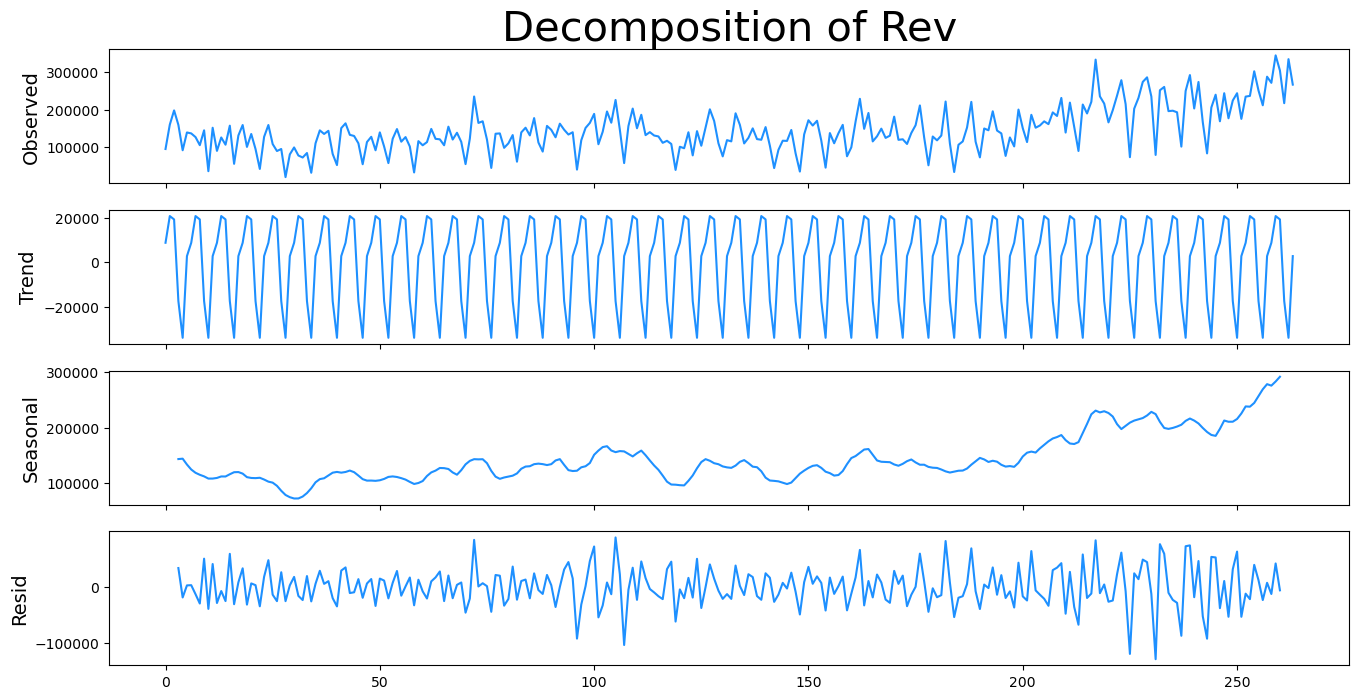

In [301]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df3.rev,  model='additive', period=6)
# statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
ax[0].set_title('Decomposition of Rev', fontsize=30)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
# ax[0,0].set_ylim([-5, 35])
res.trend.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)



res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Resid', fontsize=14)


<Axes: >

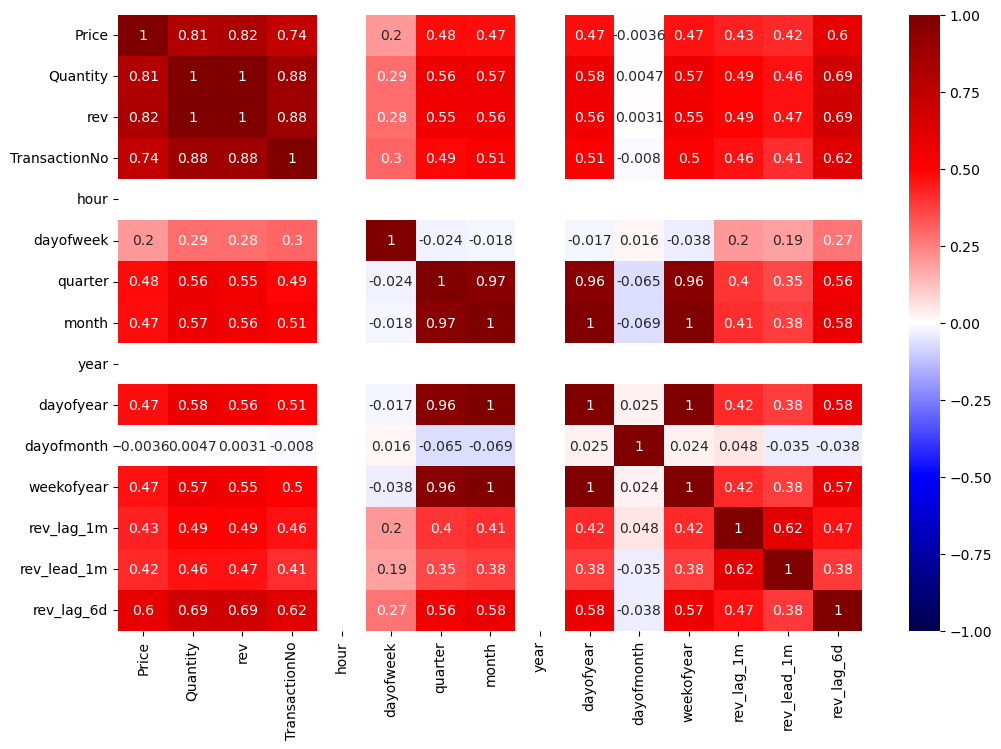

In [533]:
_,ax = plt.subplots(ncols=1,nrows=1,figsize = (12,8))
sns.heatmap(df3.select_dtypes(include='number').corr(), annot=True,cmap='seismic',vmin=-1, vmax=1)

In [224]:
df3

Date     Price  Quantity         rev  TransactionNo  hour  \
0   2018-12-01  42065.32     26785   325557.95            127     0   
1   2018-12-02  27443.34     31232   366528.50            141     0   
2   2018-12-03  30543.30     16123   205865.11             68     0   
3   2018-12-05  33727.95     16149   195080.25             88     0   
4   2018-12-06  52890.85     21689   271379.16            103     0   
..         ...       ...       ...         ...            ...   ...   
300 2019-12-05  35509.47     43705   288765.67            126     0   
301 2019-12-06  20809.13     30371   197034.90            114     0   
302 2019-12-07  14952.72     41783   263857.24            105     0   
303 2019-12-08  30745.44     34971   222848.66            120     0   
304 2019-12-09  11300.59     93925  1106037.97             44     0   

     dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  
0            5        4     12  2018        335           1          48  
1            6        4     12  2018        336           2          48  
2            0        4     12  2018        337           3          49  
3            2        4     12  2018        339           5          49  
4            3        4     12  2018        340           6          49  
..         ...      ...    ...   ...        ...         ...         ...  
300          3        4     12  2019        339           5          49  
301          4        4     12  2019        340           6          49  
302          5        4     12  2019        341           7          49  
303          6        4     12  2019        342           8          49  
304          0        4     12  2019        343           9          50  

[305 rows x 13 columns]

<Axes: xlabel='Date', ylabel='rev'>

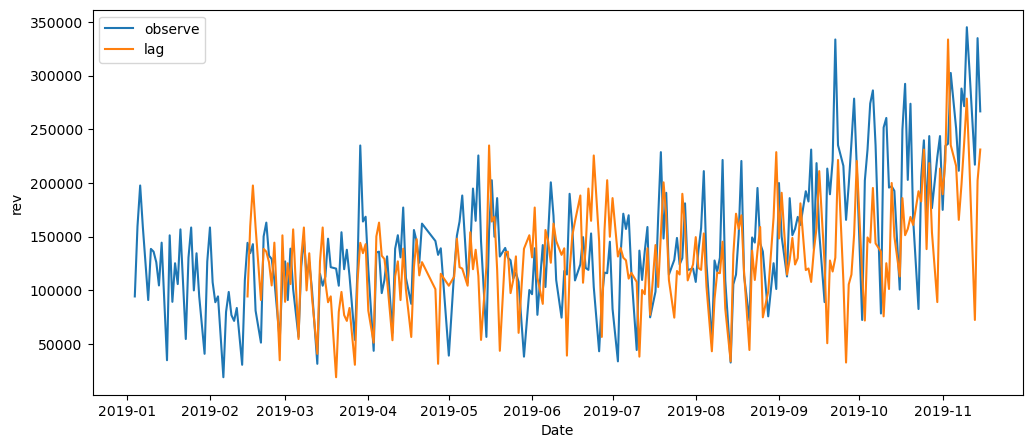

In [524]:
# Autocorrelation detection
# Shift time (there are other features besides time) 
df3['rev_lead_1m'] = df3['rev'].shift(36)
df3['rev_lag_6d'] = df3['rev'].shift(-6)

plt.figure(figsize =(12,5))
sns.lineplot(data = df3[(df3['Date']<='2019-12-01') & (df3['Date']>='2019-01-01')], x='Date',y='rev', label='observe')
sns.lineplot(data = df3[(df3['Date']<='2019-12-01') & (df3['Date']>='2019-01-01')], x='Date',y='rev_lead_1m', label='lag')

So we might have a 6-days-period autocorrelation with the data we're looking at
We then use <rev_lag_6d> as an input feature for our prediction model 

## Train test split

In [306]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df3[['rev_lag_6d','Date','Price','Quantity','TransactionNo','month','dayofyear','weekofyear']]
y = df3.rev

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [307]:
folds

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

## Predict

In [542]:
features = ['month','rev_lead_1m','dayofyear']
target = 'rev'
train = df3[(df3['Date']<'2019-10-01')&(df3['Date']>='2019-01-01')]
test = df3[df3['Date']>='2019-10-01']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]



In [386]:
X_train

month  dayofyear  weekofyear  quarter
0        1          4           1        1
1        1          5           1        1
2        1          6           1        1
3        1          7           2        1
4        1          9           2        1
..     ...        ...         ...      ...
221      9        270          39        3
222      9        271          39        3
223      9        272          39        3
224      9        273          40        3
225     10        275          40        4

[226 rows x 4 columns]

<Axes: xlabel='Date', ylabel='rev'>

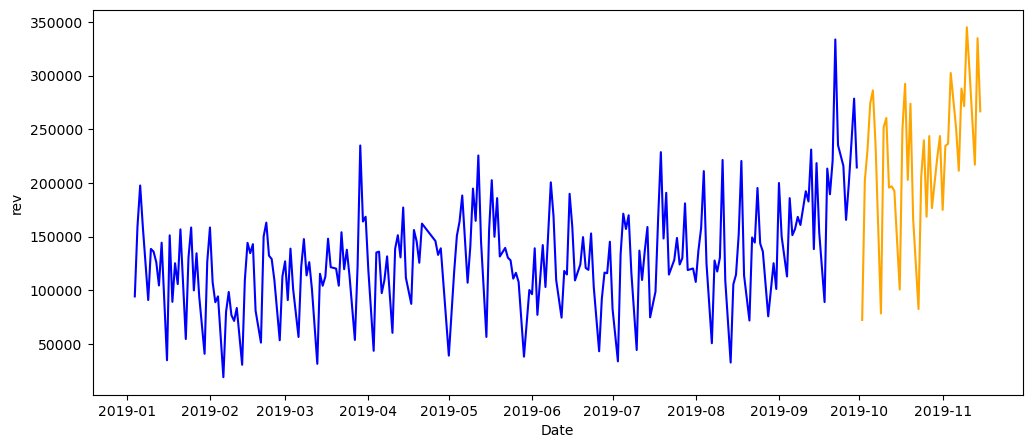

In [526]:
plt.figure(figsize=(12,5))
sns.lineplot( data = train, x = 'Date', y = 'rev', color ='blue')
sns.lineplot( data = test, x = 'Date', y = 'rev', color ='orange')

In [322]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.7 MB/s eta 0:00:00a 0:00:01m


In [349]:
# Cross validation


In [545]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=500000,
                       learning_rate=0.002, 
                       random_state = 12)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:139605.87756	validation_1-rmse:233810.12616
[100]	validation_0-rmse:116778.56352	validation_1-rmse:201140.62214
[200]	validation_0-rmse:98279.79947	validation_1-rmse:172282.31090


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [13:34:21] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:83282.93698	validation_1-rmse:147970.61219
[400]	validation_0-rmse:70998.81815	validation_1-rmse:127777.06748
[500]	validation_0-rmse:61020.26371	validation_1-rmse:111590.61960
[600]	validation_0-rmse:52794.19400	validation_1-rmse:98693.29916
[700]	validation_0-rmse:45954.42017	validation_1-rmse:88562.89295
[800]	validation_0-rmse:40258.58067	validation_1-rmse:83468.32538
[900]	validation_0-rmse:35502.12353	validation_1-rmse:79225.09833
[1000]	validation_0-rmse:31385.44663	validation_1-rmse:76066.40119
[1100]	validation_0-rmse:27795.38331	validation_1-rmse:73704.63335
[1200]	validation_0-rmse:24609.53030	validation_1-rmse:71989.08096
[1300]	validation_0-rmse:21852.88677	validation_1-rmse:70490.77046
[1400]	validation_0-rmse:19464.41505	validation_1-rmse:69347.23010
[1500]	validation_0-rmse:17369.30296	validation_1-rmse:68545.19644
[1583]	validation_0-rmse:15792.95103	validation_1-rmse:68428.07360


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.002, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500000, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [546]:
test['prediction'] = reg.predict(X_test)
combine = pd.concat([train,test])
combine

/tmp/ipykernel_42624/438313905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


Date     Price  Quantity        rev  TransactionNo  hour  dayofweek  \
0   2019-01-04  15181.31      7809   94274.04             36     0          4   
1   2019-01-05  21337.68     13360  159500.77             52     0          5   
2   2019-01-06  22906.71     16592  197596.46             48     0          6   
3   2019-01-07  22618.88     13367  158895.75             50     0          0   
4   2019-01-09  13943.12      7740   90919.29             48     0          2   
..         ...       ...       ...        ...            ...   ...        ...   
259 2019-11-10  40153.88     28632  344978.18            126     0          6   
260 2019-11-11  51761.26     25448  304413.58             98     0          0   
261 2019-11-13  36707.10     18664  216967.31             86     0          2   
262 2019-11-14  43956.02     27434  334803.65            104     0          3   
263 2019-11-15  43794.06     22139  266617.81            105     0          4   

     quarter  month  year  dayofyear  dayofmonth  weekofyear  rev_lag_1m  \
0          1      1  2019          4           4           1         NaN   
1          1      1  2019          5           5           1         NaN   
2          1      1  2019          6           6           1         NaN   
3          1      1  2019          7           7           2         NaN   
4          1      1  2019          9           9           2         NaN   
..       ...    ...   ...        ...         ...         ...         ...   
259        4     11  2019        314          10          45   286146.97   
260        4     11  2019        315          11          46   234866.90   
261        4     11  2019        317          13          46    78382.35   
262        4     11  2019        318          14          46   251602.29   
263        4     11  2019        319          15          46   260475.31   

     rev_lead_1m  rev_lag_6d     prediction  
0            NaN   135990.99            NaN  
1            NaN   126185.10            NaN  
2            NaN   104507.89            NaN  
3            NaN   144353.79            NaN  
4            NaN    34881.49            NaN  
..           ...         ...            ...  
259    278497.94         NaN  205870.875000  
260    214385.15         NaN  205870.875000  
261     72378.49         NaN  189912.609375  
262    202262.46         NaN  205870.875000  
263    231088.86         NaN  205870.875000  

[264 rows x 17 columns]

<Axes: xlabel='Date', ylabel='rev'>

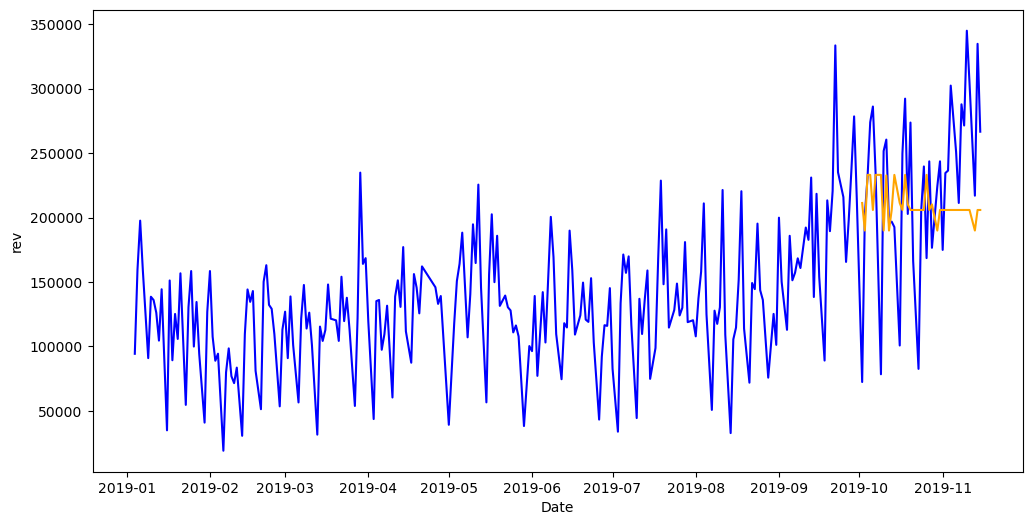

In [537]:
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine,x='Date',y='rev', color ='blue')
sns.lineplot(data = combine,x='Date',y='prediction', color ='orange')


<Axes: xlabel='Date', ylabel='rev'>

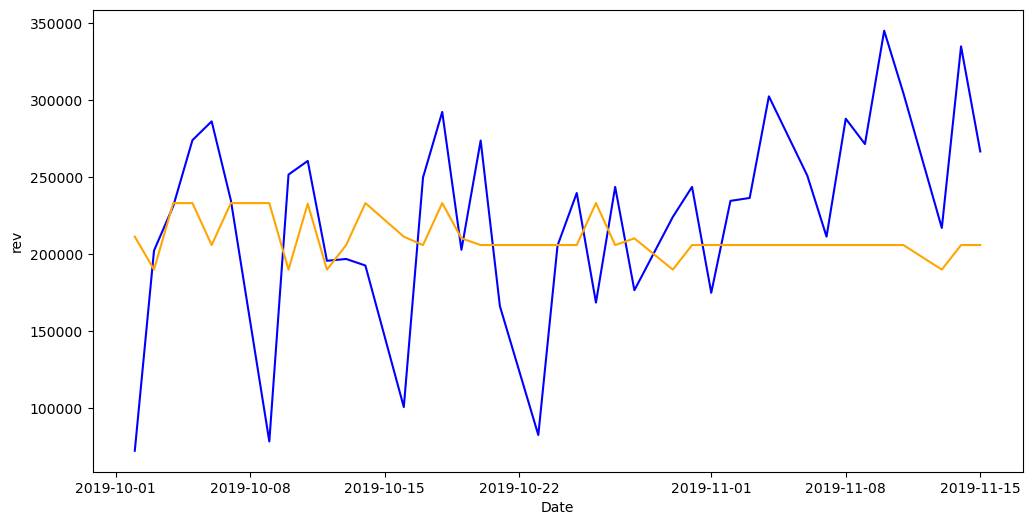

In [539]:
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine[combine['Date']>='2019-10-01'],x='Date',y='rev', color ='blue')
sns.lineplot(data = combine[combine['Date']>='2019-10-01'],x='Date',y='prediction', color ='orange')


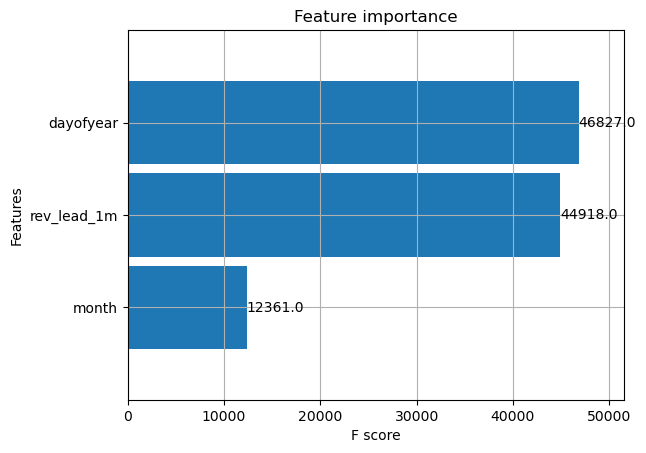

In [541]:
# from xgboost import plot_importance, plot_tree
# from sklearn.metrics import mean_squared_error, mean_absolute_error
_ = plot_importance(reg, height=0.9)

In [547]:
# scoring

y_true=test['rev']
y_pred=test['prediction']
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true, y_pred)

#hihi

32.44466151029551

In [352]:
# Predict future
df3['prediction'] = reg.predict(df3[features])
df3

Date     Price  Quantity        rev  TransactionNo  hour  dayofweek  \
0   2019-01-04  15181.31      7809   94274.04             36     0          4   
1   2019-01-05  21337.68     13360  159500.77             52     0          5   
2   2019-01-06  22906.71     16592  197596.46             48     0          6   
3   2019-01-07  22618.88     13367  158895.75             50     0          0   
4   2019-01-09  13943.12      7740   90919.29             48     0          2   
..         ...       ...       ...        ...            ...   ...        ...   
259 2019-11-10  40153.88     28632  344978.18            126     0          6   
260 2019-11-11  51761.26     25448  304413.58             98     0          0   
261 2019-11-13  36707.10     18664  216967.31             86     0          2   
262 2019-11-14  43956.02     27434  334803.65            104     0          3   
263 2019-11-15  43794.06     22139  266617.81            105     0          4   

     quarter  month  year  dayofyear  dayofmonth  weekofyear  rev_lag_1d  \
0          1      1  2019          4           4           1   135990.99   
1          1      1  2019          5           5           1   126185.10   
2          1      1  2019          6           6           1   104507.89   
3          1      1  2019          7           7           2   144353.79   
4          1      1  2019          9           9           2    34881.49   
..       ...    ...   ...        ...         ...         ...         ...   
259        4     11  2019        314          10          45         NaN   
260        4     11  2019        315          11          46         NaN   
261        4     11  2019        317          13          46         NaN   
262        4     11  2019        318          14          46         NaN   
263        4     11  2019        319          15          46         NaN   

     rev_lag_6d     prediction  
0     135990.99   94001.757812  
1     126185.10  158979.937500  
2     104507.89  196690.687500  
3     144353.79  158454.875000  
4      34881.49   90701.664062  
..          ...            ...  
259         NaN  317320.218750  
260         NaN  272246.656250  
261         NaN  223867.343750  
262         NaN  272246.656250  
263         NaN  235568.437500  

[264 rows x 16 columns]